In [1]:
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.pos("복잡하지만 Mecab 설치 오류 해결!!"))

[('복잡', 'XR'), ('하', 'XSA'), ('지만', 'EC'), ('Mecab', 'SL'), ('설치', 'NNG'), ('오류', 'NNG'), ('해결', 'NNG'), ('!', 'SF'), ('!', 'SF')]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/hotel_review_75000.csv")

In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True


In [5]:
# data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [6]:
data

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...,...,...
74995,74995,223914,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 17일,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,True
74996,74996,223915,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,2박 로맨틱 여행,2018년 11월 30일,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,True
74997,74997,223916,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 12월 4일,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,True
74998,74998,223917,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 5월 2일,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,True


In [7]:
del data['Unnamed: 0.1']

In [8]:
data.head()

,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True


In [9]:
data = data.drop('Unnamed: 0', axis=1)

In [10]:
data

,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True
...,...,...,...,...,...,...,...,...
74995,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 8월 17일,10.0,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...,True
74996,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,2박 로맨틱 여행,2018년 11월 30일,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...,True
74997,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 12월 4일,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...,True
74998,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2019년 5월 2일,8.0,우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...,True


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotelId       75000 non-null  int64  
 1   hotelName     75000 non-null  object 
 2   tripType      75000 non-null  object 
 3   tripTypeText  75000 non-null  object 
 4   reviewDate    75000 non-null  object 
 5   rating        75000 non-null  float64
 6   description   75000 non-null  object 
 7   isKorNot      75000 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 4.1+ MB


In [12]:
data = data.drop(['hotelId', 'isKorNot', 'tripTypeText'], axis=1)

In [13]:
data.head()

,hotelName,tripType,reviewDate,rating,description
0,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,2019년 1월 26일,10.0,가격에 맞게 만족했습니다
4,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...


In [14]:
data['hotelName'].nunique()

2015

In [15]:
data['tripType'].value_counts()

tripType
family          28680
other           16859
business        11487
romance         10731
with-friends     7243
Name: count, dtype: int64

In [16]:
data['rating'].describe()

count    75000.000000
mean         8.167813
std          2.199348
min          2.000000
25%          8.000000
50%          8.000000
75%         10.000000
max         10.000000
Name: rating, dtype: float64

In [17]:
data['rating'].value_counts()

rating
10.0    34103
8.0     24283
6.0      8877
4.0      4278
2.0      3459
Name: count, dtype: int64

<Axes: >

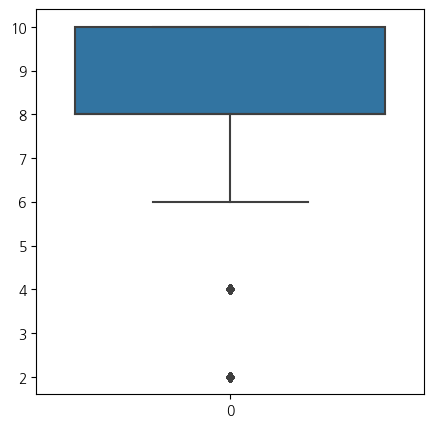

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(data['rating'])

대부분 평점이 8-10사이, 8 미만은 많지 않음

/tmp/ipykernel_864/3169801868.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rating'])
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', T

<Axes: xlabel='rating', ylabel='Density'>

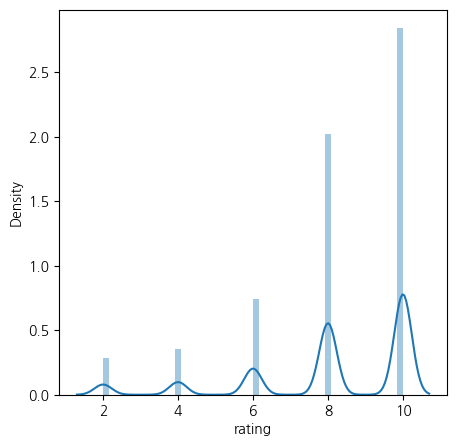

In [19]:
plt.figure(figsize=(5,5))
sns.distplot(data['rating'])

In [20]:
data.loc[data['rating'] <= 6 , ['rating', 'description']]

,rating,description
15,4.0,가성비 별로였습니다 기대를 많이 했기에 실망도 컸다고 봅니다 예약하고 사전에 메일을...
30,6.0,4번째 이 호텔을 방문하는 것이었습니다 예전에 너무 좋아하는 호텔이었는데 이번엔 실...
35,6.0,서비스 친절도가 프로답지않은 느낌입니다
41,2.0,보통 이뷰 남기지 않는데 처음으로 남겨봅니다 국내외 특급호텔 많이 다녀봤는데 이 곳...
43,2.0,고객을 편안히개 만드는 법을 잘 아는 호텔입니다 오랜 역사가 과연 명불허전 종업원 ...
...,...,...
74979,4.0,송풍기인지 환풍기인지 소음이 너무커서 시끄러웠다난방도 공조시스템으로 되어있는데 작동...
74982,6.0,별로였습니다그냥 비지니스 호텔 같은 느낌이었습니다
74990,6.0,방이 생각보다 작아서 놀랐음성수기이긴 했지만 2박에 30만원 넘는 숙소를 구했는데조...
74992,6.0,우선수건이 비치가 안되어있음수건이 없다는건 청소상태를 확인 안한듯주차구역이 적음 ...


In [21]:
data.loc[data['rating'] == 8 , ['rating', 'description']]

,rating,description
13,8.0,주니어스위트로 더블싱글침대가 있어 모두 편히 잠을 잘 수있었습니다 바로 시청앞 스케...
18,8.0,직원 친절하고 시설 좋았음
21,8.0,조선호텔은 처음 숙박하는데 듣던대로 직원분들의 서비스는 좋았습니다 연휴라 사람이 많...
33,8.0,인테리어는 오래된 호텔이라 특별히 좋거나 세련되지는 않았지만 스위트룸 객실이 다른 ...
37,8.0,따뜻한 느낌의 서비스
...,...,...
74989,8.0,설악산이근처에있고 작지만시설도 괜찮았고 만족한여행이었습니다
74993,8.0,ㆍ새로 지은 호텔이라 전반적 상태는 좋아요ㆍ옆에 고층건물이 올라와서 오션뷰는 오션뷰...
74996,8.0,객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997,8.0,배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...


In [22]:
data.loc[data['rating'] <= 6 , ['rating', 'description']].loc[15]['description']

'가성비 별로였습니다 기대를 많이 했기에 실망도 컸다고 봅니다 예약하고 사전에 메일을 보냈고 직원과 통화까지 해서 객실 요청고층에 좋은뷰을 드렸고 가능하다는 답변을 받았으나 실제 배정받은 객실은 저층인데다 제가 생각했던 뷰와는 거리가 멀었습니다 하룻밤인데 그냥 이용할까하다 특별한 기념일 이였기에 프론트에 요청을 하였고 바꾸는 과정에서도 직원분들께서 이미 상한 마음에 더 불쾌함을 주도록 응대를 하더군요 남자직원께서는 자기 직원이 아니고 익스피디아 직원이랑 통화한게 아니냐 되묻고 조선호텔에 이메일을 보냈고 조선호텔측에서 전화를 했다는 고객말은 귀담아 듣지 않으신건지 그다음 전화는 데스크 여자직원이 고객님과 직원과의 대화 소통이 잘못됐다고 하며 요청사항은 요청사항일뿐 예약확정은 아니라는 답변을 하면서 오히려 더 불쾌하게 만들더군요 체크인 과정이 순로롭지 못했던 탓인지 객실 이용 및 아리아 레스토랑 이용까지 만족스럽지 못한 느낌이였습니다'

In [23]:
data['rating']

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
74995    10.0
74996     8.0
74997     8.0
74998     8.0
74999     6.0
Name: rating, Length: 75000, dtype: float64

In [24]:
def is_good(x):
    if x >= 8:
        return 1
    else:
        return 0

In [26]:
# 참일 때 값 if 조건문 else 거짓일 때 값
# 1 if x >= 8 else 0

In [27]:
# [i for i in range(1, 10)] 리스트 표현식
[i for i in range(1,10)]


[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [28]:
data['is_good'] = data['rating'].apply(lambda x: 1 if x >= 8 else 0)

In [29]:
data['is_good2'] = data['rating'].apply(is_good)

In [30]:
data.head()

,hotelName,tripType,reviewDate,rating,description,is_good,is_good2
0,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1,1
1,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1,1
2,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1,1
3,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,1,1
4,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1,1


# konlpy토큰화 후 빈도 분석

In [31]:
from konlpy.tag import Mecab
mecab = Mecab()

In [32]:
print(mecab.nouns(data['description'][0]))

['직원', '서비스', '마인드', '완벽', '노후', '시설', '라운지', '호텔', '이름', '부족']


불용어 처리
* 불용어란 특별한 의미가 없는 단어나 조사 등
* 있, 하, 것, 들, 그

In [33]:
stopwords = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/%ED%95%9C%EA%B5%AD%EC%96%B4%EB%B6%88%EC%9A%A9%EC%96%B4100.txt', header=None, sep='\t')

In [34]:
stopwords.head()

,0
0,이
1,있
2,하
3,것
4,들


In [35]:
stopwords = list(stopwords[0])

In [36]:
stopwords 

['이',
 '있',
 '하',
 '것',
 '들',
 '그',
 '되',
 '수',
 '왜',
 '뭐',
 '거',
 '해',
 '저',
 '너',
 '건',
 '은',
 '걸',
 '진짜',
 '보',
 '않',
 '없',
 '나',
 '사람',
 '주',
 '아니',
 '등',
 '같',
 '우리',
 '때',
 '년',
 '가',
 '한',
 '지',
 '대하',
 '오',
 '말',
 '일',
 '그렇',
 '위하',
 '때문',
 '그것',
 '두',
 '말하',
 '알',
 '그러나',
 '받',
 '못하',
 '일',
 '그런',
 '또',
 '문제',
 '더',
 '사회',
 '많',
 '그리고',
 '좋',
 '크',
 '따르',
 '중',
 '나오',
 '가지',
 '씨',
 '시키',
 '만들',
 '지금',
 '생각하',
 '그러',
 '속',
 '하나',
 '집',
 '살',
 '모르',
 '적',
 '월',
 '데',
 '자신',
 '안',
 '어떤',
 '내',
 '내',
 '경우',
 '명',
 '생각',
 '시간',
 '그녀',
 '다시',
 '이런',
 '앞',
 '보이',
 '번',
 '나',
 '다른',
 '어떻',
 '여자',
 '개',
 '전',
 '들',
 '사실',
 '이렇',
 '점',
 '싶',
 '말',
 '정도',
 '좀',
 '원',
 '잘',
 '통하',
 '소리',
 '놓']

In [37]:
stopwords.append('호텔')

In [38]:
# data['description']의 내용을 mecab.nouns를 활용해 명사만 추출 후 다시 저장하시오.
data['description2'] = data['description'].apply(mecab.nouns)

In [39]:
data.head()

,hotelName,tripType,reviewDate,rating,description,is_good,is_good2,description2
0,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1,1,"[직원, 서비스, 마인드, 완벽, 노후, 시설, 라운지, 호텔, 이름, 부족]"
1,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1,1,"[웨스틴, 조선, 면, 최고, 숙소, 생각, 분위기, 편의, 직원, 친절, 인상]"
2,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1,1,"[서울, 시내, 호, 수, 곳, 아침, 뷔페, 곳, 룸서비스, 요구, 사항, 응대,..."
3,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,1,1,"[가격, 만족]"
4,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1,1,"[처음, 명, 셋, 점, 직원, 친절, 서비스, 맘, 시설, 불편, 추가, 커피, ..."


In [40]:
data['description2'][0]

['직원', '서비스', '마인드', '완벽', '노후', '시설', '라운지', '호텔', '이름', '부족']

In [44]:
# data['description2'] 에 있는 모든 단어를 추출해서 all_word 리스트에 담되
# stopwords안에 있는 단어는 제외하고 담으세요
all_word = []
for i in data['description2']:
    for j in i:
        if j not in stopwords:
            all_word.append(j)
        else:
            continue
len(all_word)

848907

# nltk를 이용한 단어 빈도 분석하기

In [ ]:
# !pip install nltk

In [45]:
from nltk.probability import FreqDist

In [46]:
FreqDist(all_word)

FreqDist({'방': 13963, '친절': 13472, '만족': 13058, '시설': 11505, '직원': 11089, '조식': 11004, '이용': 10289, '위치': 9001, '객실': 8717, '주변': 8010, ...})

In [49]:
FreqDist(all_word)

FreqDist({'방': 13963, '친절': 13472, '만족': 13058, '시설': 11505, '직원': 11089, '조식': 11004, '이용': 10289, '위치': 9001, '객실': 8717, '주변': 8010, ...})

Wordcloud 그리기

In [52]:
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumGothic')

In [50]:
from wordcloud import WordCloud

In [54]:
font = '/usr/share/fonts/opentype/noto/NotoSansCJK-Black.ttc'

(-0.5, 599.5, 599.5, -0.5)

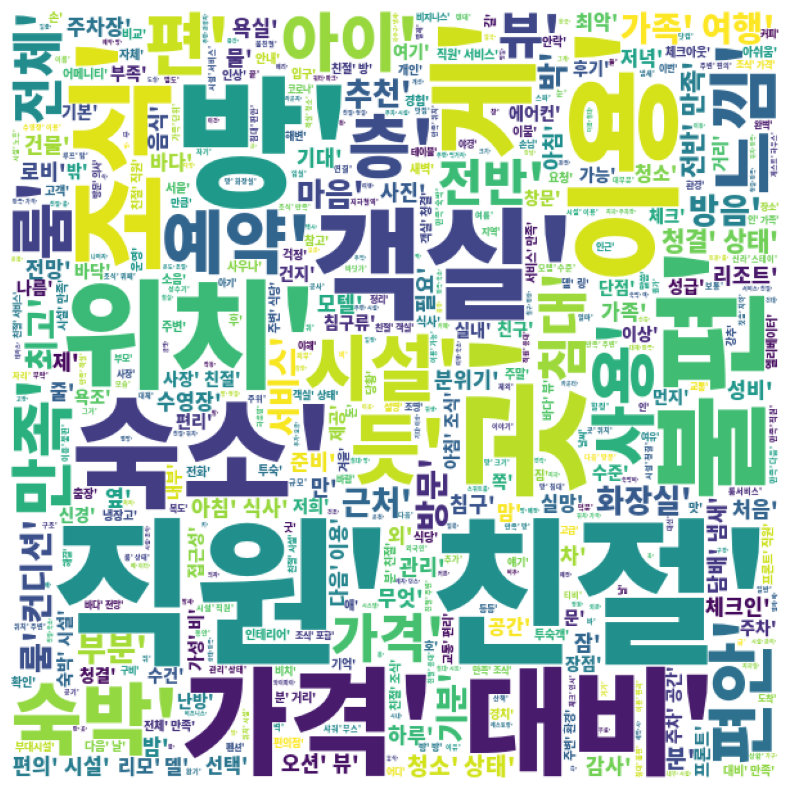

In [57]:
wc = WordCloud(
    width = 600,
    height = 600,
    max_words=15000,
    font_path=font,
    background_color='white',
    stopwords=['숙소', '숙박']
).generate(str(all_word))
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')

# rating이 8이상인 사용자 리뷰는 good
# rating이 7이하인 사용자 리뷰는 bad로 나누어 워드 클라우드 생성

In [60]:
good = data.loc[data['rating'] >= 8, 'description2']
bad = data.loc[data['rating'] <= 7, 'description2']

# GOOD

(-0.5, 399.5, 399.5, -0.5)

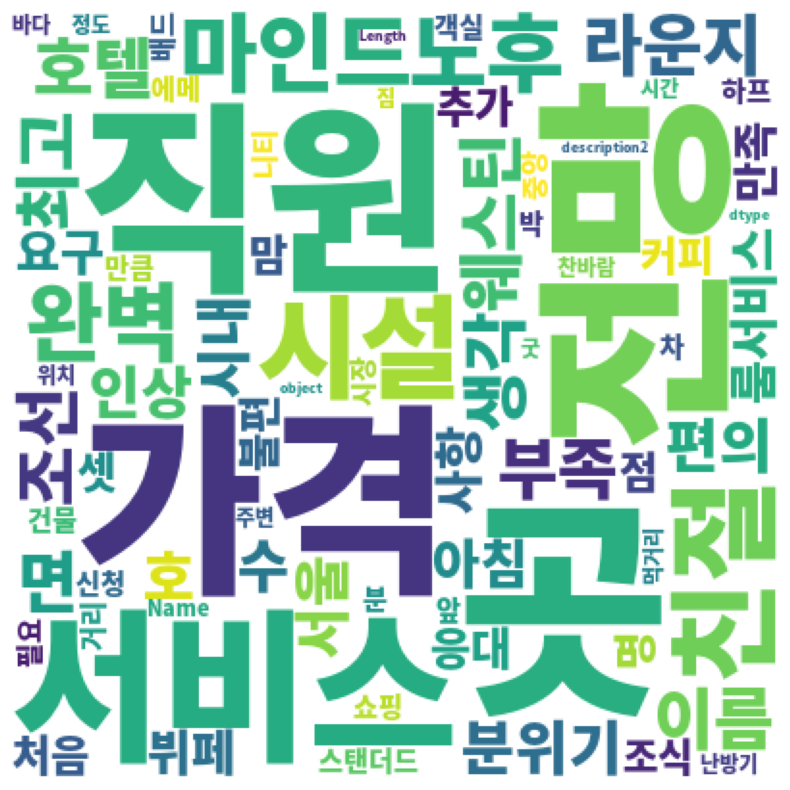

In [63]:
wc = WordCloud(
    width = 400,
    height = 400,
    max_words=15000,
    font_path=font,
    background_color='white',
    stopwords=['숙소', '숙박']
).generate(str(good))
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')

# BAD

(-0.5, 399.5, 399.5, -0.5)

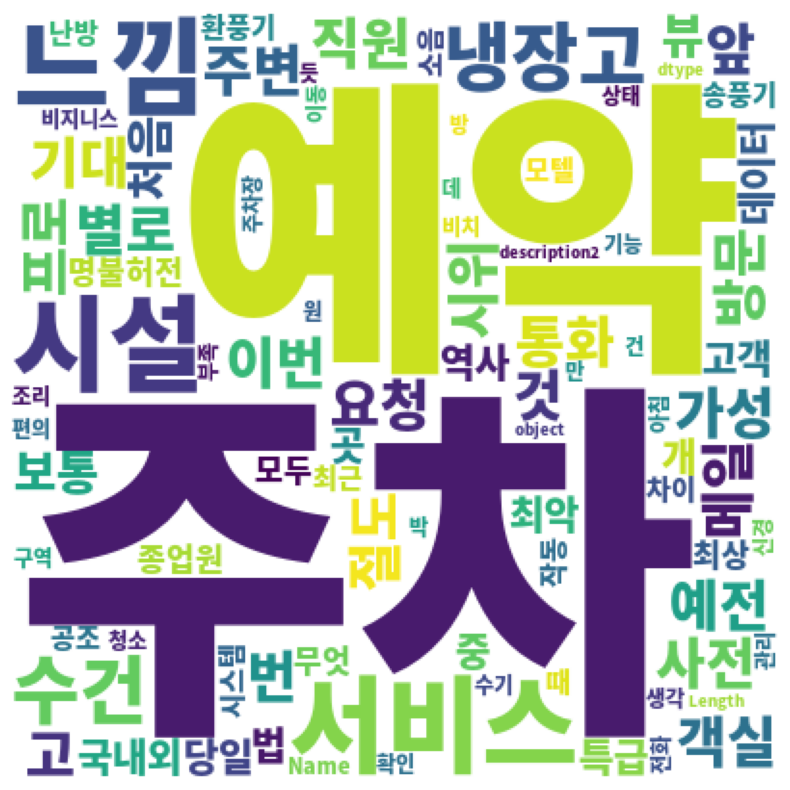

In [66]:
wc = WordCloud(
    width = 400,
    height = 400,
    max_words=15000,
    font_path=font,
    background_color='white',
    stopwords=['숙소', '숙박', '호텔', '실망']
).generate(str(bad))
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')

In [77]:
data.loc[data['description'].str.contains("주차"), ['tripType','description']]

,tripType,description
61,other,음식도 맛있고 깨끗하고 좋아요명동에서 가깝고 가격도 좋고 친절하고 주차도 좋도 오...
80,family,주차장진입이 좀 어렵지만 역사가 있는 오랜호텔이라 그러련했습니다 객실컨디션과 직원응...
114,other,5성급이라 그런지 서비스가 훌륭합니다모든 직원분들이 친절하시고 객실상태도 최고입니다...
116,other,체크인때 주차부터 모든 직원분들이 친절하셨고 쾌적하게 잘 지내고 왔습니다
178,other,주차장이 살짝 거리가 있어서 발렛이 아니면 좀 걸어야하는 점 투숙객에 주차비를 받는...
...,...,...
74990,family,방이 생각보다 작아서 놀랐음성수기이긴 했지만 2박에 30만원 넘는 숙소를 구했는데조...
74992,family,우선수건이 비치가 안되어있음수건이 없다는건 청소상태를 확인 안한듯주차구역이 적음 ...
74993,family,ㆍ새로 지은 호텔이라 전반적 상태는 좋아요ㆍ옆에 고층건물이 올라와서 오션뷰는 오션뷰...
74995,romance,조식과 스탠더드 하프전망 신청해서 1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...


In [79]:
for i in data.loc[(data['description'].str.contains("주차")) & (data['is_good']==0), 'description'][20:40]:
    print(i)
    print()

주차장이 좀 협소하고 연결되어 있었음 하는 아쉬움이 있었음

위치는 좋습니다만  주차가 제대로 안내가 안 되어 불편했습니다 캐리어를 들고 3층에서 내려왔어요 주차 시간에도 융통성이 없어 체크아웃 직후 헐레벌떡 나왔어야 했습니다 그리고 무료 업그레이드의 상품으로 구매를 했으나 업그레이드는 2만원을 따로 내야한다고 안내 받았습니다 뷰가 좋은 방을 부탁했는데 그것도 잘 모르겠습니다 방이나 시설은 노후화된 편이었습니다 다음에는 금액을 조금 더 내고 다른 곳에 투숙할 것 같습니다

주차하기 무서운 곳 경사가 심하고 비오는 날엔 주차장 안에서도 비를 맞아야 함 호텔이 저렴한 이유인지 모르지만 내부가 너무 낡음교통이 편하고 주변에서 머꺼리 팢기는 쉬웠음 호텔 직원들이 친절하고 협조적이어서 인상적임

주차장인 주차타워와 호텔이 너무 멀어서 햇빛 뜨거운 날씨에 아기를 데리고 차를 타고 주변 다니기는 정말 어려웠고도착하자마자 욕조에는 누군가의 머리카락이 바로 보였고8개월 아기가 있어 미리 아기침대를 신청했음에도 나중에 올려준다고 해서 어른 침대에서 재우다가 잠깐 눈 돌린 사이에 떨어져서 응급실에 다녀왔고 아기침대는 6시 반 넘어서 다시 한 번 전화해서야 갖다줬고 화장실의 수압은 너무 약했고주변 사거리는 공사중이라 복잡했고직원들은 친절했지만 큰 기대하고 갔는데 뭐라 말할 수도 없이 최악의 기억만 갖고 왔습니다다시는 찾고 싶지 않습니다

면세점과 구분되지 않은 복잡함주차 안내도 서 있는 직원마다 일관되지 않고 제각각남한테 내 차 맡기기 싫어서 발렛 안했더니 잡상인 취급하듯이 사람 막대하지를 않나주차타워에 주차하고 그랜저 타고 올라가는데 무전기로 직원들끼리 짜증내고 육두문자 남발하는거 다 들림신라호텔이라는 이름에 부끄럽지 않은지밖에서 고생하는건 알겠는데 주차요원 및 셔틀 직원들 교육이 필요한듯

2박 했는데  묶었던 방 옆방을 창고 처럼 사용하고 있어 직원이 들락 날락 문여는 소리 쿵 닫는 소리 쿵 머리가 울릴정도 였다 인포에 전화 했으나 개선 되지 않고 룸 앞에서  출입하는 직원을

In [80]:
data.head()

,hotelName,tripType,reviewDate,rating,description,is_good,is_good2,description2
0,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1,1,"[직원, 서비스, 마인드, 완벽, 노후, 시설, 라운지, 호텔, 이름, 부족]"
1,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1,1,"[웨스틴, 조선, 면, 최고, 숙소, 생각, 분위기, 편의, 직원, 친절, 인상]"
2,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1,1,"[서울, 시내, 호, 수, 곳, 아침, 뷔페, 곳, 룸서비스, 요구, 사항, 응대,..."
3,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,1,1,"[가격, 만족]"
4,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1,1,"[처음, 명, 셋, 점, 직원, 친절, 서비스, 맘, 시설, 불편, 추가, 커피, ..."


# 나이브 베이즈 알고리즘으로 텍스트 감성분석하기

In [81]:
X = data['description']
y = data['is_good']

In [82]:
X

0        직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1        웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2        서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3                                            가격에 맞게 만족했습니다
4        처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
                               ...                        
74995    조식과 스탠더드 하프전망 신청해서  1박 했는데요ᆢ너무 좋아요ᆢ다만 가격이 좀 나가...
74996    객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997    배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998    우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...
74999    주차장이 부족해서 다른데에 주차했는데 아침에 이동해달라는 전화가 와서 다소 불쾌했슴...
Name: description, Length: 75000, dtype: object

In [83]:
y

0        1
1        1
2        1
3        1
4        1
        ..
74995    1
74996    1
74997    1
74998    1
74999    0
Name: is_good, Length: 75000, dtype: int64

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

In [85]:
cv = CountVectorizer(lowercase=False)
cv.fit(X)
X = cv.transform(X)

In [86]:
X

<75000x261324 sparse matrix of type '<class 'numpy.int64'>'
	with 1300173 stored elements in Compressed Sparse Row format>

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [88]:
y.value_counts()

is_good
1    58386
0    16614
Name: count, dtype: int64

# 나이브 베이즈 로 분석

In [89]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [90]:
from sklearn.metrics import accuracy_score, classification_report

In [91]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8551555555555556
              precision    recall  f1-score   support

           0       0.74      0.55      0.63      5066
           1       0.88      0.94      0.91     17434

    accuracy                           0.86     22500
   macro avg       0.81      0.75      0.77     22500
weighted avg       0.85      0.86      0.85     22500



/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

#  랜덤포레스트로 분석

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5, n_estimators=1000, random_state = 10, n_jobs=-1)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.7748444444444444
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5066
           1       0.77      1.00      0.87     17434

    accuracy                           0.77     22500
   macro avg       0.39      0.50      0.44     22500
weighted avg       0.60      0.77      0.68     22500



/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

# 하이퍼파라미터 튜닝 랜덤서치

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
import warnings
warnings.filterwarnings(action='ignore')

In [105]:
params = dict(max_depth=[3,5,7,10], n_estimators=[100, 500, 1000], criterion=["gini", "entropy", "log_loss"])
params

{'max_depth': [3, 5, 7, 10],
 'n_estimators': [100, 500, 1000],
 'criterion': ['gini', 'entropy', 'log_loss']}

In [108]:
rand_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_jobs=-1, random_state=10)
rand_cv.fit(X_train, y_train)
pred = rand_cv.predict(X_test)
print('최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최적 예측 정확도: {rand_cv.best_score_:.4f}')

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

최적 하이퍼 파라미터:  {'n_estimators': 100, 'max_depth': 3, 'criterion': 'log_loss'}
최적 예측 정확도: 0.7800


In [109]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3, n_estimators=100, criterion='log_loss', random_state = 10, n_jobs=-1)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7748444444444444
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5066
           1       0.77      1.00      0.87     17434

    accuracy                           0.77     22500
   macro avg       0.39      0.50      0.44     22500
weighted avg       0.60      0.77      0.68     22500



# 데이터 증폭/축소 후 하이퍼파라미터 튜닝하고 최종 모델 만들기

## 데이터 증폭 후 분석

In [110]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [111]:
y_res.value_counts()

is_good
1    40952
0    40952
Name: count, dtype: int64

In [112]:
rand_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_jobs=-1, random_state=10)
rand_cv.fit(X_res, y_res)
pred = rand_cv.predict(X_test)
print('최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최적 예측 정확도: {rand_cv.best_score_:.4f}')

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) o

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

최적 하이퍼 파라미터:  {'n_estimators': 1000, 'max_depth': 7, 'criterion': 'log_loss'}
최적 예측 정확도: 0.7503


In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=7, n_estimators=1000, criterion='log_loss', random_state = 10, n_jobs=-1)
rfc.fit(X_res, y_res)
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8060888888888889
              precision    recall  f1-score   support

           0       0.55      0.76      0.64      5066
           1       0.92      0.82      0.87     17434

    accuracy                           0.81     22500
   macro avg       0.74      0.79      0.75     22500
weighted avg       0.84      0.81      0.82     22500



## 데이터 축소 후 분석

In [114]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import AllKNN
allknn = AllKNN()
X_res2, y_res2 = allknn.fit_resample(X_train, y_train)

In [115]:
rand_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_jobs=-1, random_state=10)
rand_cv.fit(X_res2, y_res2)
pred = rand_cv.predict(X_test)
print('최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최적 예측 정확도: {rand_cv.best_score_:.4f}')

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

최적 하이퍼 파라미터:  {'n_estimators': 100, 'max_depth': 7, 'criterion': 'entropy'}
최적 예측 정확도: 0.5804


In [117]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=7, n_estimators=100, criterion='entropy', random_state = 10, n_jobs=-1)
rfc.fit(X_res2, y_res2)
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7756444444444445
              precision    recall  f1-score   support

           0       1.00      0.00      0.01      5066
           1       0.78      1.00      0.87     17434

    accuracy                           0.78     22500
   macro avg       0.89      0.50      0.44     22500
weighted avg       0.83      0.78      0.68     22500



In [119]:
y_res2.value_counts(0)

is_good
1    15885
0    11548
Name: count, dtype: int64

In [118]:
y.value_counts()

is_good
1    58386
0    16614
Name: count, dtype: int64

# TfidfVectorizer로 분석

In [120]:
X2 = data['description']
y2 = data['is_good']

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
from konlpy.tag import Mecab
mecab = Mecab()
def tw_tokenizer(text):
    tokens_ko = mecab.morphs(text)
    return tokens_ko

In [126]:
tfidfv = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9, lowercase=False)

In [127]:
X2 = tfidfv.fit_transform(X2)

In [128]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=10)

In [129]:
model_tfidv = MultinomialNB()
model_tfidv.fit(X_train2, y_train2)
pred2 = model_tfidv.predict(X_test2)
print(accuracy_score(y_test2, pred2))
print(classification_report(y_test2, pred2))

0.8370666666666666
              precision    recall  f1-score   support

           0       0.89      0.31      0.46      5066
           1       0.83      0.99      0.90     17434

    accuracy                           0.84     22500
   macro avg       0.86      0.65      0.68     22500
weighted avg       0.85      0.84      0.81     22500



# OneSidedSelection 으로 데이터 축소

In [130]:
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection(random_state=42)
X_res3, y_res3 = oss.fit_resample(X_train, y_train)

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
from konlpy.tag import Mecab
mecab = Mecab()
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = mecab.morphs(text)
    return tokens_ko

In [95]:
tfidfv = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9, lowercase=False)

In [96]:
X2 = tfidfv.fit_transform(X2)

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [97]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state=100)

In [98]:
model_tfidv = MultinomialNB()
model_tfidv.fit(X_train2, y_train2)
pred_tfidv = model_tfidv.predict(X_test2)

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [99]:
print(accuracy_score(y_test2, pred_tfidv))
print(classification_report(y_test2, pred_tfidv))

0.8461333333333333
              precision    recall  f1-score   support

           0       0.88      0.37      0.52      3405
           1       0.84      0.98      0.91     11595

    accuracy                           0.85     15000
   macro avg       0.86      0.68      0.72     15000
weighted avg       0.85      0.85      0.82     15000



/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [131]:
rand_cv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, n_jobs=-1, random_state=10)
rand_cv.fit(X_res3, y_res3)
pred = rand_cv.predict(X_test)
print('최적 하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최적 예측 정확도: {rand_cv.best_score_:.4f}')

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future ve

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/haram4th/.conda/envs/nlp/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

최적 하이퍼 파라미터:  {'n_estimators': 100, 'max_depth': 3, 'criterion': 'log_loss'}
최적 예측 정확도: 0.7799


In [132]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3, n_estimators=100, criterion='log_loss', random_state = 10, n_jobs=-1)
rfc.fit(X_res3, y_res3)
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7748444444444444
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5066
           1       0.77      1.00      0.87     17434

    accuracy                           0.77     22500
   macro avg       0.39      0.50      0.44     22500
weighted avg       0.60      0.77      0.68     22500

